## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import io
import requests
import os, ssl
import matplotlib.pyplot as plt
import seaborn as sns


# Task-1

### Data Retrieving

In [2]:
data=pd.read_excel('./Data/Data_Cortex_Nuclear.xls')
df=data
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
df.shape

(1080, 82)

In [4]:
df.describe(include='all')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
count,1080,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000,1080,1080,1080,1080
unique,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,8
top,J1291_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Control,Memantine,S/C,c-SC-m
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,570,570,555,150
mean,NaN,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,...,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784,NaN,NaN,NaN,NaN
std,NaN,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,...,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126,NaN,NaN,NaN,NaN
min,NaN,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,...,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479,NaN,NaN,NaN,NaN
25%,NaN,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,...,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423,NaN,NaN,NaN,NaN
50%,NaN,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,...,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441,NaN,NaN,NaN,NaN
75%,NaN,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,...,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824,NaN,NaN,NaN,NaN


In [5]:
#Check for Typos and Exra white spaces in categorical columns
categorical_cols = df.columns[df.dtypes==object].tolist()
for col in categorical_cols:
    print(df[col].value_counts())

J1291_2     1
3426_9      1
3534_3      1
3488_10     1
3522_12     1
           ..
50810C_9    1
321_1       1
3504_8      1
309_6       1
3411_1      1
Name: MouseID, Length: 1080, dtype: int64
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
Memantine    570
Saline       510
Name: Treatment, dtype: int64
S/C    555
C/S    525
Name: Behavior, dtype: int64
c-SC-m    150
c-CS-m    150
c-CS-s    135
t-SC-m    135
t-SC-s    135
t-CS-m    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64


In [6]:
# Checking any unusual values in the numerical columns
numeric_cols = df.columns[df.dtypes==float].tolist()
for col in numeric_cols:
    print(col + "                Minimum: " + str(min(df[col])) + ",             Maximum: "+ str(max(df[col])))

DYRK1A_N                Minimum: 0.145326504,             Maximum: 2.516367377
ITSN1_N                Minimum: 0.245358515,             Maximum: 2.602662135
BDNF_N                Minimum: 0.115181402,             Maximum: 0.497159859
NR1_N                Minimum: 1.330830671,             Maximum: 3.757641331
NR2A_N                Minimum: 1.737539936,             Maximum: 8.482553422
pAKT_N                Minimum: 0.063236006,             Maximum: 0.539050132
pBRAF_N                Minimum: 0.064042588,             Maximum: 0.317065589
pCAMKII_N                Minimum: 1.343998185,             Maximum: 7.464070214
pCREB_N                Minimum: 0.112811791,             Maximum: 0.306247231
pELK_N                Minimum: 0.429032258,             Maximum: 6.113347458
pERK_N                Minimum: 0.149155227,             Maximum: 3.566685372
pJNK_N                Minimum: 0.05211039,             Maximum: 0.493425858
PKCA_N                Minimum: 0.191430693,             Maximum: 0.473

### Checking Data Types in the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [8]:
# Checking number of unique values in categorical features.
print(df.Genotype.unique())
print(df.Treatment.unique())
print(df.Behavior.unique())

['Control' 'Ts65Dn']
['Memantine' 'Saline']
['C/S' 'S/C']


## Checking missing Values in the Dataframe 

In [9]:
df.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

### Total count of missing values in the enitire dataframe

In [10]:
df.isna().sum().sum()

1396

In [11]:
# Dropping rows with all cells with NA.
df.dropna(how='all',inplace=True)
df.isna().sum().sum()

1396

## Missing Value treatment using sklearn Simple Imputer

 Replacing all the missing values in the dataframe with the mean of the column

In [12]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df.iloc[:,1:78])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [13]:
df.iloc[:,1:78]=imp_mean.transform(df.iloc[:,1:78])
df1=df

In [14]:
# checking missing values after impuatation with mean
df.isna().sum().sum()

0

In [15]:
df.describe(include = np.number).round(2)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,...,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00,1080.00
mean,0.43,0.62,0.32,2.30,3.84,0.23,0.18,3.54,0.21,1.43,...,0.23,0.16,0.13,0.12,0.13,0.45,0.17,0.18,0.21,1.34
std,0.25,0.25,0.05,0.35,0.93,0.04,0.03,1.29,0.03,0.47,...,0.03,0.03,0.02,0.01,0.02,0.07,0.05,0.04,0.05,0.32
min,0.15,0.25,0.12,1.33,1.74,0.06,0.06,1.34,0.11,0.43,...,0.16,0.09,0.08,0.07,0.09,0.26,0.08,0.11,0.10,0.59
25%,0.29,0.47,0.29,2.06,3.16,0.21,0.16,2.48,0.19,1.21,...,0.21,0.14,0.12,0.11,0.11,0.40,0.13,0.16,0.17,1.08
50%,0.37,0.57,0.32,2.30,3.76,0.23,0.18,3.33,0.21,1.36,...,0.22,0.16,0.13,0.12,0.13,0.45,0.17,0.18,0.21,1.32
75%,0.49,0.70,0.35,2.53,4.43,0.26,0.20,4.48,0.23,1.56,...,0.24,0.17,0.14,0.13,0.14,0.49,0.19,0.20,0.22,1.59
max,2.52,2.60,0.50,3.76,8.48,0.54,0.32,7.46,0.31,6.11,...,0.36,0.28,0.26,0.16,0.26,0.76,0.48,0.36,0.41,2.13


In [16]:
df.describe(include = np.object)

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,J1291_2,Control,Memantine,S/C,c-SC-m
freq,1,570,570,555,150


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

# Task-2

## Data Exploration

## Single Variable plots

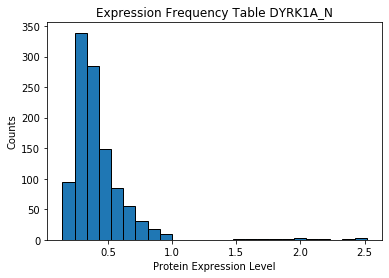

In [18]:
# Histogram plot for protien DYRK1A_N

protein = df['DYRK1A_N']
plt.hist(protein, bins=25, edgecolor='black')
plt.title('Expression Frequency Table DYRK1A_N')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')
plt.show()

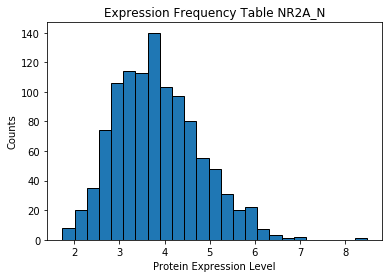

In [19]:
# Histogram plot for protien NR2A_N

protein = df['NR2A_N']
plt.hist(protein, bins=25, edgecolor='black')
plt.title('Expression Frequency Table NR2A_N')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')
plt.show()

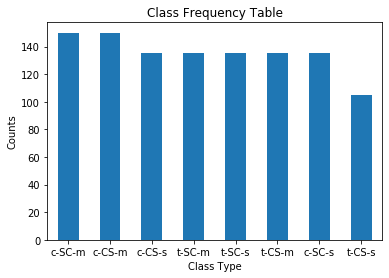

In [20]:
#Bar plot for the target feature 'class'

df['class'].value_counts().plot(kind='bar')
plt.title('Class Frequency Table')
plt.xlabel('Class Type')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()

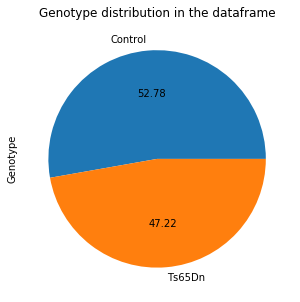

In [21]:
# Pie chart distribution of Genotype variable
df['Genotype'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%.2f')
plt.title('Genotype distribution in the dataframe')
plt.show()

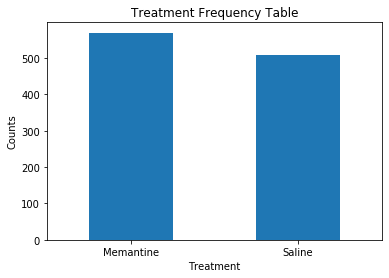

In [22]:
#Bar plot for the feature 'Treatment'

df['Treatment'].value_counts().plot(kind='bar')
plt.title('Treatment Frequency Table')
plt.xlabel('Treatment')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()

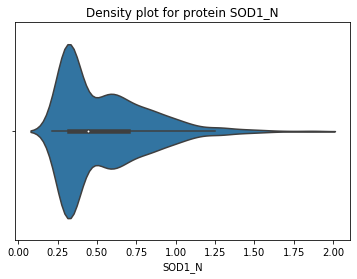

In [23]:
# Density plot of protein SOD1_N
sns.violinplot(x="SOD1_N", data=df).set_title('Density plot for protein SOD1_N')
plt.show()

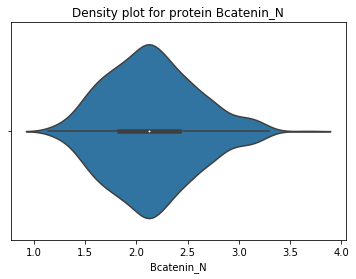

In [24]:
# Density plot of protein Bcatenin_N
sns.violinplot(x="Bcatenin_N", data=df).set_title('Density plot for protein Bcatenin_N')
plt.show()

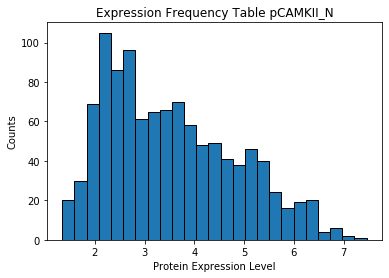

In [25]:
# Histogram plot for protien pCAMKII_N

protein = df['pCAMKII_N']
plt.hist(protein, bins=25, edgecolor='black')
plt.title('Expression Frequency Table pCAMKII_N')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')
plt.show()

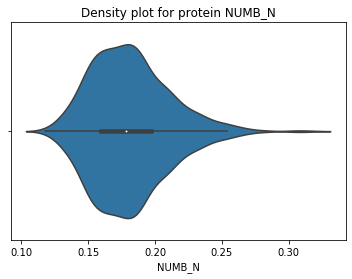

In [26]:
# Histogram plot for protien NUMB_N
sns.violinplot(x="NUMB_N", data=df).set_title('Density plot for protein NUMB_N')
plt.show()

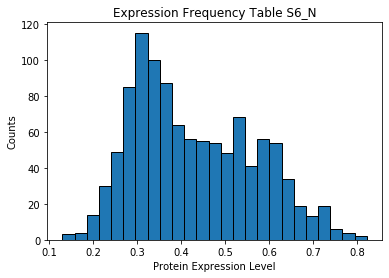

In [27]:
# Histogram plot for protien S6_N

protein = df['S6_N']
plt.hist(protein, bins=25, edgecolor='black')
plt.title('Expression Frequency Table S6_N')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')
plt.show()

## Two Variable plots with Hypothesis

Hypothesis-1: Investigation to determine that protein DYRK1A_N and protein ITSN1_N have a linear relationship between them

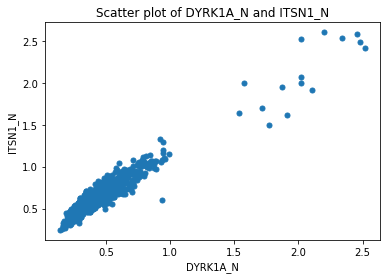

In [28]:
plt.plot( 'DYRK1A_N', 'ITSN1_N', data=df, linestyle='none', marker='o',markersize=5)
plt.title('Scatter plot of DYRK1A_N and ITSN1_N')
plt.xlabel("DYRK1A_N")
plt.ylabel("ITSN1_N")
plt.show()

The above graph shows a positive linear relationship between the two proteins that supports my hypothesis

Hypothesis-2: Investigation to determine that Ts65Dn category mouse show more C/S type behavior as compared to S/C behavior irrespective of the type of drug Memantine or saline

Text(0, 0.5, 'Count')

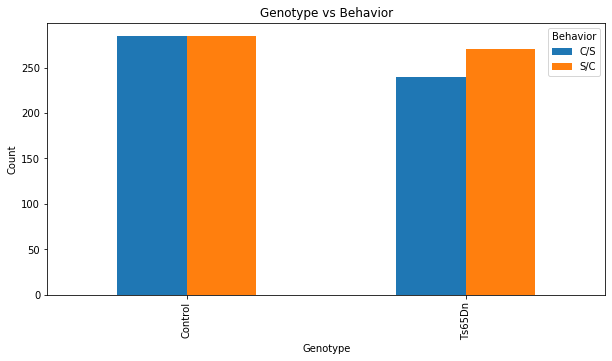

In [29]:
pd.crosstab(df['Genotype'],df['Behavior'] ).plot(kind='bar',figsize=(10,5), stacked=False)
plt.title('Genotype vs Behavior')
plt.xlabel('Genotype')
plt.ylabel('Count')

My hypothesis is proved to be wrong as the graph above depicts that Ts65Dn category mouse show more S/C type behavior as compared to C/S behavior irrespective of the type of drug Memantine or saline

Hypothesis-3: Investigation to determine that all mouse injected with Memantine show more C/S type behavior as compared to S/C behavior irrespective of the type of mouse it is injected to.

Text(0, 0.5, 'Count')

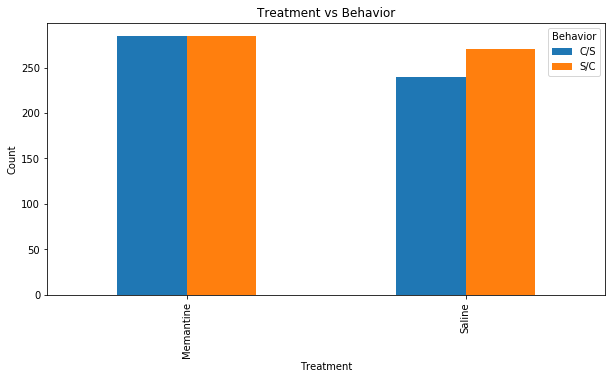

In [30]:
pd.crosstab(df['Treatment'],df['Behavior'] ).plot(kind='bar',figsize=(10,5), stacked=False)
plt.title('Treatment vs Behavior')
plt.xlabel('Treatment')
plt.ylabel('Count')

My hypothesis is not exactly true as the graph above depicts that all mouse injected with Memantine show equal C/S type behavior and S/C behavior irrespective of the type of mouse it is injected to.

Hypotheis-4: Investigation to determine that protein GluR4_N and protein IL1B_N have a linear relationship between them

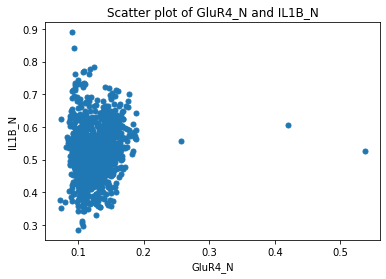

In [31]:
plt.plot( 'GluR4_N', 'IL1B_N', data=df, linestyle='none', marker='o',markersize=5)
plt.title('Scatter plot of GluR4_N and IL1B_N')
plt.xlabel("GluR4_N")
plt.ylabel("IL1B_N")
plt.show()

The above scatter plot shows that there is no specific kind of relation between protein type GluR4_N and protein IL1B_N as the points are well scattered in the plot.

Hypothesis-5: Investigation to determine the equal distributon of protein ARC_N across both Genotypes

Text(0, 0.5, 'value')

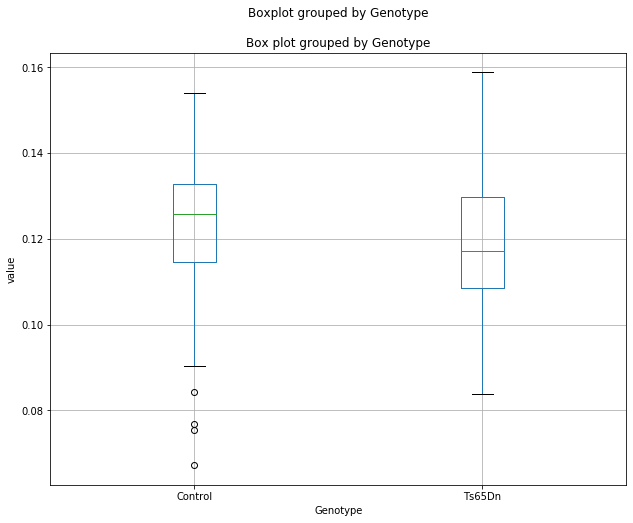

In [32]:
# boxplot for Genotype and protein ARC_N
df.boxplot(column='ARC_N', by='Genotype', figsize = (10,8))
plt.title('Box plot grouped by Genotype')
plt.xlabel("Genotype")
plt.ylabel("value")

The above box plots shows that the distribution protein ARC_N is more varied in case of trisomic type mouse than that of control  mouse.

    Hypothesis 6: Investigation to determine the similar distribution of protein TIAM1_N across both Genotype

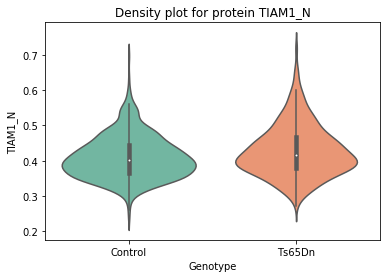

In [33]:
# boxplot for Genotype and protein TIAM1_N
sns.violinplot(x="Genotype", y="TIAM1_N", data=df,palette='Set2').set_title('Density plot for protein TIAM1_N')
plt.show()

The above graph supports my hypothesis that their distribution is similar and is more concentrated around their median.

Hypothesis 7: Investigation to determine the similar distribution of protein Ubiquitin_N across all class

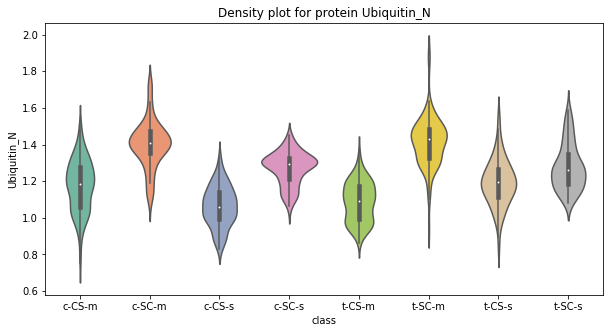

In [34]:
# Violin plot to display distribution of protein across all class
plt.figure(figsize=(10,5))
sns.violinplot(x="class", y="Ubiquitin_N", data=df,palette='Set2').set_title('Density plot for protein Ubiquitin_N')
plt.show()

The hypothesis is not true as the above violin plot shows the different distribution of protein Ubiquitin_N across all class.

Hypothesis-8: Investigation to determine that protein SNCA_N and protein pGSK3B_Tyr216_N have a linear relationship between them

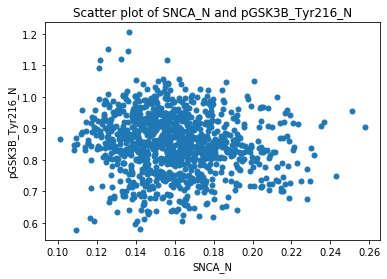

In [35]:
plt.plot( 'SNCA_N', 'pGSK3B_Tyr216_N', data=df, linestyle='none', marker='o',markersize=5)
plt.title('Scatter plot of SNCA_N and pGSK3B_Tyr216_N')
plt.xlabel("SNCA_N")
plt.ylabel("pGSK3B_Tyr216_N")
plt.show()

The above scatter plot shows that there is no relation between protein SNCA_N and protein pGSK3B_Tyr216_N as the points are well  scatterd in the graph

Hypothesis 9: Investigation to determine the similar distribution of protein pCAMKII_N across both Treatment type

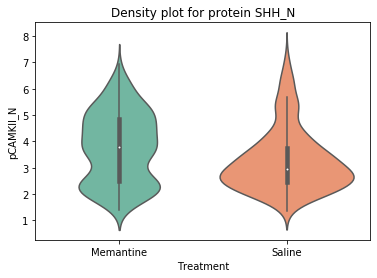

In [36]:
sns.violinplot(x="Treatment", y="pCAMKII_N", data=df,palette='Set2').set_title('Density plot for protein SHH_N')
plt.show()

The violin density plot suggests that the distribution of protein is more concentrated about the median in case of saline and better distributed in case of Memantine. Hence the hypothesis is not true.

Hypothesis-10: Investigation to determine that protein SNCA_N and protein pNR1_N have a linear relationship between them

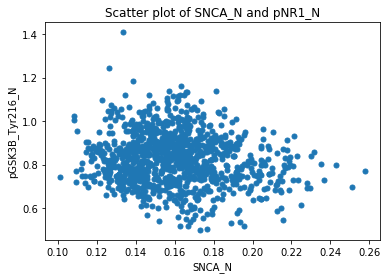

In [37]:
plt.plot( 'SNCA_N', 'pNR1_N', data=df, linestyle='none', marker='o',markersize=5)
plt.title('Scatter plot of SNCA_N and pNR1_N')
plt.xlabel("SNCA_N")
plt.ylabel("pGSK3B_Tyr216_N")
plt.show()

The above scatter plot shows that there is no relation between protein SNCA_N and protein pNR1_N as the points are well  scatterd in the graph

# Data Modelling

Before begining the Data Modelling process we need to get rid of unnecessary columns or any columns that provides redundant information.
1. We drop the 'class' column and save it in a different variable name 'target'- As this is the feature we are trying to predict.
2. We drop 'MouseID' column from the dataframe as it is a unique variable and serves no purpose in prediction of target.
3. We drop 'Genotype', 'Treatment', 'Behavior' columns from the dataframe as they provide redundant information and is same as provided by the 'class'-target column.

In [38]:
df1=df1.drop(columns='class')
df1.drop(columns='MouseID',inplace=True)
df1.drop(columns='Genotype',inplace=True)
df1.drop(columns='Treatment',inplace=True)
df1.drop(columns='Behavior',inplace=True)

In [39]:
# Separating target feature from the dataframe
target=df['class']
target.value_counts()

c-SC-m    150
c-CS-m    150
c-CS-s    135
t-SC-m    135
t-SC-s    135
t-CS-m    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64

## Scaling of the descriptive features
### Using scikit learn MinMaxScaler to scale the descriptive feaatures

In [40]:
from sklearn import preprocessing
Data = preprocessing.MinMaxScaler().fit_transform(df1)

In [41]:
# Dataframe with descriptive features after scaling(Df_scaled)
Df_scaled= pd.DataFrame(Data,columns=df1.columns)
Df_scaled.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,...,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,...,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,...,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,...,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,...,0.245702,0.215008,0.299172,0.410187,0.147711,0.350381,0.096959,0.136298,0.149281,0.812053


## Generating Train/Test Set

## Taking instance where train-test Split ratio is 50-50


In [42]:
# Taking instance where train-test Split ratio is 50-50
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Df_scaled,target,test_size=0.5,random_state=4)

In [43]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (540, 77)
y_train: (540,)
X_test: (540, 77)
y_test: (540,)


## K-Nearest Neighbour Classifier and its Hyperparameter Tuning

In [44]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbor with default parameters(K=5, weights=uniform , p=2)
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
y_pre=clf.predict(X_test)
y_pre.shape

(540,)

In [46]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pre)
print(cm)

[[67  0  0  0  0  2  0  0]
 [ 8 61  0  0  2  1  0  0]
 [ 0  0 78  0  0  0  2  1]
 [ 0  0  1 51  4  0  0  0]
 [ 8  0  0  0 60  3  0  0]
 [ 9  0  0  0  3 45  0  0]
 [ 1  0  2  0  0  0 66  0]
 [ 0  0  2  0  0  0  0 63]]


In [47]:
# Training score of the KNN model
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.90926


In [48]:
# Classification Report to get all the scoring metric scores
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.72      0.97      0.83        69
      c-CS-s       1.00      0.85      0.92        72
      c-SC-m       0.94      0.96      0.95        81
      c-SC-s       1.00      0.91      0.95        56
      t-CS-m       0.87      0.85      0.86        71
      t-CS-s       0.88      0.79      0.83        57
      t-SC-m       0.97      0.96      0.96        69
      t-SC-s       0.98      0.97      0.98        65

    accuracy                           0.91       540
   macro avg       0.92      0.91      0.91       540
weighted avg       0.92      0.91      0.91       540



We observe that a KNN model with default parameters (K=5, weights=uniform , p=2) gives a accuracy score of 0.91

In [49]:
#Fitting the data inside the model using X_train and y_train using (p=1) K classifier
clf_p1 = KNeighborsClassifier(p=1)
fit_p1 = clf_p1.fit(X_train, y_train)
y_pre_p1 = fit_p1.predict(X_test)   

In [50]:
cm = confusion_matrix(y_test, y_pre_p1)
print (cm)

[[67  0  0  0  0  2  0  0]
 [ 8 61  0  0  1  2  0  0]
 [ 0  0 78  0  0  0  3  0]
 [ 0  0  1 53  2  0  0  0]
 [ 5  0  0  0 63  3  0  0]
 [ 5  0  0  0  4 48  0  0]
 [ 0  0  1  3  0  0 65  0]
 [ 0  0  2  0  0  0  0 63]]


In [51]:
print(classification_report(y_test,y_pre_p1))

              precision    recall  f1-score   support

      c-CS-m       0.79      0.97      0.87        69
      c-CS-s       1.00      0.85      0.92        72
      c-SC-m       0.95      0.96      0.96        81
      c-SC-s       0.95      0.95      0.95        56
      t-CS-m       0.90      0.89      0.89        71
      t-CS-s       0.87      0.84      0.86        57
      t-SC-m       0.96      0.94      0.95        69
      t-SC-s       1.00      0.97      0.98        65

    accuracy                           0.92       540
   macro avg       0.93      0.92      0.92       540
weighted avg       0.93      0.92      0.92       540



We observe that a KNN model with parameters (K=5, weights=uniform , p=1) gives a accuracy score of 0.92 which is slightly better than the model with default parameters.

In [52]:
#Fitting the data inside the model using X_train and y_train using (k = 3) K classifier with parameter weights=distance
clf_k3 = KNeighborsClassifier(3,weights='distance')
fit_k3 = clf_k3.fit(X_train, y_train)
y_pre_k3 = fit_k3.predict(X_test)   

In [53]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre_k3)
print(cm)

[[66  1  0  0  0  2  0  0]
 [ 4 67  0  0  0  1  0  0]
 [ 0  0 80  0  0  0  1  0]
 [ 0  0  0 55  1  0  0  0]
 [ 0  0  0  0 68  3  0  0]
 [ 3  0  0  0  0 54  0  0]
 [ 0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0 65]]


In [54]:
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.90926


In [55]:
print (classification_report(y_test,y_pre_k3))

              precision    recall  f1-score   support

      c-CS-m       0.90      0.96      0.93        69
      c-CS-s       0.99      0.93      0.96        72
      c-SC-m       1.00      0.99      0.99        81
      c-SC-s       1.00      0.98      0.99        56
      t-CS-m       0.99      0.96      0.97        71
      t-CS-s       0.90      0.95      0.92        57
      t-SC-m       0.99      1.00      0.99        69
      t-SC-s       1.00      1.00      1.00        65

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



We observe that a KNN model with parameters (K=3, weights=distance , p=2) gives a accuracy score of 0.97.

In [56]:
#Fitting the data inside the model using X_train and y_train using (k = 4) K classifier
clf_k5 = KNeighborsClassifier(4)
fit_k5 = clf_k5.fit(X_train, y_train)
y_pre_k5 = fit_k5.predict(X_test)   

In [57]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre_k5)
print (cm)

[[67  0  0  0  0  2  0  0]
 [10 62  0  0  0  0  0  0]
 [ 0  0 79  0  0  0  2  0]
 [ 0  0  1 54  1  0  0  0]
 [ 4  0  0  0 65  2  0  0]
 [ 6  0  0  0  0 51  0  0]
 [ 0  0  3  0  0  0 66  0]
 [ 0  0  2  0  0  0  0 63]]


In [58]:
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.90926


In [59]:
print (classification_report(y_test,y_pre_k5))

              precision    recall  f1-score   support

      c-CS-m       0.77      0.97      0.86        69
      c-CS-s       1.00      0.86      0.93        72
      c-SC-m       0.93      0.98      0.95        81
      c-SC-s       1.00      0.96      0.98        56
      t-CS-m       0.98      0.92      0.95        71
      t-CS-s       0.93      0.89      0.91        57
      t-SC-m       0.97      0.96      0.96        69
      t-SC-s       1.00      0.97      0.98        65

    accuracy                           0.94       540
   macro avg       0.95      0.94      0.94       540
weighted avg       0.95      0.94      0.94       540



We observe that a KNN model with parameters (K=4, weights=uniform , p=2) gives a accuracy score of 0.94.

In [60]:
#Fitting the data inside the model using X_train and y_train using (k = 4) K classifier and weights= distance
clf_k5 = KNeighborsClassifier(4,weights='distance')
fit_k5 = clf_k5.fit(X_train, y_train)
y_pre_k5 = fit_k5.predict(X_test)   

In [61]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre_k5)
print (cm)

[[67  0  0  0  0  2  0  0]
 [ 5 67  0  0  0  0  0  0]
 [ 0  0 79  0  0  0  2  0]
 [ 0  0  0 55  1  0  0  0]
 [ 0  0  0  0 69  2  0  0]
 [ 4  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  0 69  0]
 [ 0  0  1  0  0  0  0 64]]


In [62]:
print (classification_report(y_test,y_pre_k5))

              precision    recall  f1-score   support

      c-CS-m       0.88      0.97      0.92        69
      c-CS-s       1.00      0.93      0.96        72
      c-SC-m       0.99      0.98      0.98        81
      c-SC-s       1.00      0.98      0.99        56
      t-CS-m       0.99      0.97      0.98        71
      t-CS-s       0.93      0.93      0.93        57
      t-SC-m       0.97      1.00      0.99        69
      t-SC-s       1.00      0.98      0.99        65

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



We observe that a KNN model with parameters (K=4, weights=distance , p=2) gives a accuracy score of 0.97.

## Feature Selection for KNN Model

Now we do feature selection with the best model we can come up with after hyper parameter tuning. We obtain similar results for K=3 and K=4. so we can pick any one of the model. Below feature selection is based on the KNN model with K=3 and weights =distance.


In [63]:
Df_scaled1=Df_scaled.iloc[:].values

In [64]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=4)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Df_scaled1[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.5, random_state=4)
    clf = KNeighborsClassifier(3,weights='distance')
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.18703703703703703
Score with 2 selected features: 0.28703703703703703
Score with 3 selected features: 0.44074074074074077
Score with 4 selected features: 0.6555555555555556
Score with 5 selected features: 0.7296296296296296
Score with 6 selected features: 0.7648148148148148
Score with 7 selected features: 0.85
Score with 8 selected features: 0.8648148148148148
Score with 9 selected features: 0.8796296296296297
Score with 10 selected features: 0.8925925925925926
Score with 11 selected features: 0.9055555555555556
Score with 12 selected features: 0.9055555555555556
Score with 13 selected features: 0.9351851851851852
Score with 14 selected features: 0.937037037037037
Score with 15 selected features: 0.9425925925925925
Score with 16 selected features: 0.9518518518518518
Score with 17 selected features: 0.9518518518518518
Score with 18 selected features: 0.9555555555555556
Score with 19 selected features: 0.9611111111111111
Score with 20 selected features: 

In [65]:
print("There are " + str(len(new_Ind)) + " features selected:")

There are 36 features selected:


In [66]:
# Printing column ids
print(new_Ind)

[49, 66, 60, 48, 14, 26, 73, 29, 19, 5, 41, 20, 7, 6, 65, 39, 22, 12, 54, 17, 34, 45, 32, 51, 62, 70, 56, 67, 0, 52, 58, 9, 50, 72, 1, 46]


In [67]:
columns=[]
cols = Df_scaled.columns
for i in new_Ind:
    columns.append(cols[i])

In [68]:
# Generating Train and Test split on New set of fetures after feature selection
Df_scaled_new=Df_scaled[columns]
X_train, X_test, y_train, y_test = train_test_split(Df_scaled_new, target, test_size=0.5, random_state=0)

In [69]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (540, 36)
y_train: (540,)
X_test: (540, 36)
y_test: (540,)


In [70]:
clf = KNeighborsClassifier(3,weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   

In [71]:
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[71  0  0  0  0  0  0  0]
 [ 2 69  0  0  1  3  0  0]
 [ 0  0 81  0  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 2  2  0  0 63  0  0  0]
 [ 0  0  0  0  0 51  0  0]
 [ 0  0  1  0  0  0 59  0]
 [ 0  0  0  0  0  0  0 69]]


In [72]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.95      1.00      0.97        71
      c-CS-s       0.97      0.92      0.95        75
      c-SC-m       0.99      1.00      0.99        81
      c-SC-s       1.00      1.00      1.00        66
      t-CS-m       0.98      0.94      0.96        67
      t-CS-s       0.94      1.00      0.97        51
      t-SC-m       1.00      0.98      0.99        60
      t-SC-s       1.00      1.00      1.00        69

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## Comparison (Train-Test Split 50-50)

### KNN models on Hyperparameter Tuning with Accuracy score  

                      Model                    Accuracy
    1. KNN Model(k=5, p=2, weights= uniform)-   0.91
    
    2. KNN Model(k=5, p=1, weights= uniform)-   0.92
    
    3. KNN Model(k=3, p=2, weights= distance)-   0.97
    
    4. KNN Model(k=4, p=2, weights= uniform)-   0.94
    
    5. KNN Model(k=4, p=2, weights= distance)-   0.97
    
    6. KNN Model(k=3, p=2, weights= distance)
        with feature selection               -   0.98

# Taking instance of 60% training and 40% testing dataset


In [73]:
X_train, X_test, y_train, y_test = train_test_split(Df_scaled, target, test_size=0.4, random_state=0)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(648, 77)
(432, 77)
(648,)
(432,)


In [75]:
#Fitting the data inside the model using X_train and y_train using default K classifier(k=5, p=2, weights= uniform)
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [76]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[58  0  0  0  0  0  0  0]
 [ 2 48  0  0  0  3  0  0]
 [ 0  0 60  2  0  0  0  0]
 [ 0  0  3 54  0  0  1  0]
 [ 9  0  0  0 49  0  0  1]
 [ 2  0  0  0  1 40  0  0]
 [ 0  0  2  0  0  0 44  0]
 [ 0  0  1  0  0  0  0 52]]


In [77]:
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.93750


In [78]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.82      1.00      0.90        58
      c-CS-s       1.00      0.91      0.95        53
      c-SC-m       0.91      0.97      0.94        62
      c-SC-s       0.96      0.93      0.95        58
      t-CS-m       0.98      0.83      0.90        59
      t-CS-s       0.93      0.93      0.93        43
      t-SC-m       0.98      0.96      0.97        46
      t-SC-s       0.98      0.98      0.98        53

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.94      0.94      0.94       432



We observe that a KNN model with default parameters (K=5, weights=uniform , p=2) gives a accuracy score of 0.94

In [79]:
#Fitting the data inside the model using X_train and y_train using p=1 classifier(k=5,p=1,weights=uniform)
clf = KNeighborsClassifier(p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [80]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[58  0  0  0  0  0  0  0]
 [ 1 50  0  0  1  1  0  0]
 [ 0  0 61  1  0  0  0  0]
 [ 0  0  1 57  0  0  0  0]
 [ 8  0  0  0 50  0  0  1]
 [ 2  0  0  0  2 39  0  0]
 [ 0  0  0  2  0  0 44  0]
 [ 0  0  0  0  0  0  0 53]]


In [81]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.84      1.00      0.91        58
      c-CS-s       1.00      0.94      0.97        53
      c-SC-m       0.98      0.98      0.98        62
      c-SC-s       0.95      0.98      0.97        58
      t-CS-m       0.94      0.85      0.89        59
      t-CS-s       0.97      0.91      0.94        43
      t-SC-m       1.00      0.96      0.98        46
      t-SC-s       0.98      1.00      0.99        53

    accuracy                           0.95       432
   macro avg       0.96      0.95      0.95       432
weighted avg       0.96      0.95      0.95       432



We observe that a KNN model with parameters (K=5, weights=uniform , p=1) gives a accuracy score of 0.95.

In [82]:
#Fitting the data inside the model using X_train and y_train using k=3 classifier(k=3,p=2,weights=distance)
clf = KNeighborsClassifier(3,weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   

In [83]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[58  0  0  0  0  0  0  0]
 [ 1 51  0  0  0  1  0  0]
 [ 0  0 62  0  0  0  0  0]
 [ 0  0  1 56  0  0  1  0]
 [ 3  2  0  0 52  1  0  1]
 [ 0  0  0  0  0 43  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 53]]


In [84]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.94      1.00      0.97        58
      c-CS-s       0.96      0.96      0.96        53
      c-SC-m       0.98      1.00      0.99        62
      c-SC-s       1.00      0.97      0.98        58
      t-CS-m       1.00      0.88      0.94        59
      t-CS-s       0.96      1.00      0.98        43
      t-SC-m       0.98      1.00      0.99        46
      t-SC-s       0.98      1.00      0.99        53

    accuracy                           0.97       432
   macro avg       0.97      0.98      0.97       432
weighted avg       0.98      0.97      0.97       432



We observe that a KNN model with parameters (K=3, weights=distance , p=2) gives a accuracy score of 0.97 

In [85]:
#Fitting the data inside the model using X_train and y_train using k=3 classifier(k=4,p=2,weights=uniform)
clf = KNeighborsClassifier(4,weights='uniform')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [86]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[58  0  0  0  0  0  0  0]
 [ 4 49  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0]
 [ 0  0  2 56  0  0  0  0]
 [ 7  2  0  0 50  0  0  0]
 [ 2  0  0  0  2 39  0  0]
 [ 0  0  2  1  0  0 43  0]
 [ 0  0  1  0  0  0  0 52]]


In [87]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.82      1.00      0.90        58
      c-CS-s       0.96      0.92      0.94        53
      c-SC-m       0.93      1.00      0.96        62
      c-SC-s       0.98      0.97      0.97        58
      t-CS-m       0.96      0.85      0.90        59
      t-CS-s       1.00      0.91      0.95        43
      t-SC-m       1.00      0.93      0.97        46
      t-SC-s       1.00      0.98      0.99        53

    accuracy                           0.95       432
   macro avg       0.96      0.95      0.95       432
weighted avg       0.95      0.95      0.95       432



We observe that a KNN model with parameters (K=2, weights=uniform , p=2) gives a accuracy score of 0.95

In [88]:
#Fitting the data inside the model using X_train and y_train using k=4 classifier(k=4, p=2, weights=distance)
clf = KNeighborsClassifier(4,weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [89]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[58  0  0  0  0  0  0  0]
 [ 1 52  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0]
 [ 0  0  2 56  0  0  0  0]
 [ 5  2  0  0 52  0  0  0]
 [ 0  0  0  0  0 43  0  0]
 [ 0  0  1  1  0  0 44  0]
 [ 0  0  0  0  0  0  0 53]]


In [90]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.91      1.00      0.95        58
      c-CS-s       0.96      0.98      0.97        53
      c-SC-m       0.95      1.00      0.98        62
      c-SC-s       0.98      0.97      0.97        58
      t-CS-m       1.00      0.88      0.94        59
      t-CS-s       1.00      1.00      1.00        43
      t-SC-m       1.00      0.96      0.98        46
      t-SC-s       1.00      1.00      1.00        53

    accuracy                           0.97       432
   macro avg       0.98      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



We observe that a KNN model with parameters (K=2, weights=distance , p=2) gives a accuracy score of 0.97 

## Feature Selection for KNN Model

Now we do feature selection with the best model we can come up with after hyper parameter tuning. We obtain similar results for K=3 and K=4. so we can pick any one of the model. Below feature selection is based on the KNN model with K=3 and weights =distance.

In [91]:
Df_scaled1=Df_scaled.iloc[:].values

In [92]:
# feature selection
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=4)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Df_scaled1[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=4)
    clf = KNeighborsClassifier(3, weights='distance')
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.16666666666666666
Score with 2 selected features: 0.2662037037037037
Score with 3 selected features: 0.46296296296296297
Score with 4 selected features: 0.6620370370370371
Score with 5 selected features: 0.7615740740740741
Score with 6 selected features: 0.7939814814814815
Score with 7 selected features: 0.8796296296296297
Score with 8 selected features: 0.8912037037037037
Score with 9 selected features: 0.9050925925925926
Score with 10 selected features: 0.9212962962962963
Score with 11 selected features: 0.9282407407407407
Score with 12 selected features: 0.9282407407407407
Score with 13 selected features: 0.9282407407407407
Score with 14 selected features: 0.9305555555555556
Score with 15 selected features: 0.9583333333333334
Score with 16 selected features: 0.9606481481481481
Score with 17 selected features: 0.9699074074074074
Score with 18 selected features: 0.9722222222222222
Score with 19 selected features: 0.9722222222222222
Score with 20 selec

In [93]:
columns=[]
cols = Df_scaled.columns
for i in new_Ind:
    columns.append(cols[i])

In [94]:
# New set of fetures after feature selection
Df_scaled_new=Df_scaled[columns]
X_train, X_test, y_train, y_test = train_test_split(Df_scaled_new, target, test_size=0.4, random_state=0)

In [95]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (648, 36)
y_train: (648,)
X_test: (432, 36)
y_test: (432,)


In [96]:
clf = KNeighborsClassifier(3,weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [97]:
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[58  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  1  0  0]
 [ 0  0 62  0  0  0  0  0]
 [ 0  0  0 57  0  0  1  0]
 [ 3  0  0  0 56  0  0  0]
 [ 0  0  0  0  0 43  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 53]]


In [98]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.95      1.00      0.97        58
      c-CS-s       1.00      0.98      0.99        53
      c-SC-m       1.00      1.00      1.00        62
      c-SC-s       1.00      0.98      0.99        58
      t-CS-m       1.00      0.95      0.97        59
      t-CS-s       0.98      1.00      0.99        43
      t-SC-m       0.98      1.00      0.99        46
      t-SC-s       1.00      1.00      1.00        53

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



## Comparison(Train-Test Split 60-40)

### KNN models on Hyperparameter Tuning with Accuracy score  

                    Model                     Accuracy
    1. KNN Model(k=5, p=2, weights= uniform)-   0.94
    
    2. KNN Model(k=5, p=1, weights= uniform)-   0.95
    
    3. KNN Model(k=3, p=2, weights= distance)-   0.97
    
    4. KNN Model(k=4, p=2, weights= uniform)-   0.95
    
    5. KNN Model(k=4, p=2, weights= distance)-   0.97
    
    6. KNN Model(k=3, p=2, weights= distance)
        with feature selection               -   0.99

## Creating a 80% training and 20% testing dataset by separating the target and feature variables


In [99]:
# creating a 80% training and 20% testing dataset by separating the target and feature variables
X_train, X_test, y_train, y_test = train_test_split(Df_scaled, target, test_size=0.2, random_state=0)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 77)
(216, 77)
(864,)
(216,)


In [101]:
#Fitting the data inside the model using X_train and y_train using default K classifier(k=5, p=2, weights=uniform)
clf = KNeighborsClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [102]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[24  0  0  0  0  0  0  0]
 [ 1 25  0  0  0  1  0  0]
 [ 0  0 24  1  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 2  0  0  0  0 25  0  0]
 [ 0  0  2  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 26]]


In [103]:
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[Train/test split] score: 0.96759


In [104]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.89      1.00      0.94        24
      c-CS-s       1.00      0.93      0.96        27
      c-SC-m       0.92      0.96      0.94        25
      c-SC-s       0.97      1.00      0.98        31
      t-CS-m       1.00      1.00      1.00        32
      t-CS-s       0.96      0.93      0.94        27
      t-SC-m       1.00      0.92      0.96        24
      t-SC-s       1.00      1.00      1.00        26

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216



We observe that a KNN model with parameters (K=5, weights=uniform , p=2) gives a accuracy score of 0.97 

In [105]:
#Fitting the data inside the model using X_train and y_train using p=1 classifier(k=5, p=1,weights=uniform)
clf = KNeighborsClassifier(p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [106]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[24  0  0  0  0  0  0  0]
 [ 1 25  0  0  0  1  0  0]
 [ 0  0 24  1  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 2  0  0  0  1 24  0  0]
 [ 0  0  0  1  0  0 23  0]
 [ 0  0  0  0  0  0  0 26]]


In [107]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.89      1.00      0.94        24
      c-CS-s       1.00      0.93      0.96        27
      c-SC-m       1.00      0.96      0.98        25
      c-SC-s       0.94      1.00      0.97        31
      t-CS-m       0.97      1.00      0.98        32
      t-CS-s       0.96      0.89      0.92        27
      t-SC-m       1.00      0.96      0.98        24
      t-SC-s       1.00      1.00      1.00        26

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216



We observe that a KNN model with parameters (K=5, weights=uniform , p=1) gives a accuracy score of 0.97

In [108]:
#Fitting the data inside the model using X_train and y_train using k=3 classifier(k=3, p=2, weights=distance)
clf = KNeighborsClassifier(3,weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [109]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[24  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  1  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 26]]


In [110]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        24
      c-CS-s       1.00      0.96      0.98        27
      c-SC-m       1.00      1.00      1.00        25
      c-SC-s       1.00      1.00      1.00        31
      t-CS-m       1.00      1.00      1.00        32
      t-CS-s       0.96      1.00      0.98        27
      t-SC-m       1.00      1.00      1.00        24
      t-SC-s       1.00      1.00      1.00        26

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



We observe that a KNN model with parameters (K=3, weights=distance , p=2) gives a accuracy score of 1.0 

In [111]:
#Fitting the data inside the model using X_train and y_train using k=4 classifier(k4, weights=uniform, p=2)
clf = KNeighborsClassifier(4)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [112]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[24  0  0  0  0  0  0  0]
 [ 1 25  0  0  0  1  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 2  0  0  0  1 24  0  0]
 [ 0  0  2  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 26]]


In [113]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.89      1.00      0.94        24
      c-CS-s       1.00      0.93      0.96        27
      c-SC-m       0.93      1.00      0.96        25
      c-SC-s       1.00      1.00      1.00        31
      t-CS-m       0.97      1.00      0.98        32
      t-CS-s       0.96      0.89      0.92        27
      t-SC-m       1.00      0.92      0.96        24
      t-SC-s       1.00      1.00      1.00        26

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216



We observe that a KNN model with parameters (K=4, weights=uniform , p=2) gives a accuracy score of 0.97 

In [114]:
#Fitting the data inside the model using X_train and y_train using k=4 classifier(k4, weights=distance, p=2)
clf = KNeighborsClassifier(4, weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [115]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[24  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  1  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 27  0  0]
 [ 0  0  2  0  0  0 22  0]
 [ 0  0  0  0  0  0  0 26]]


In [116]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        24
      c-CS-s       1.00      0.96      0.98        27
      c-SC-m       0.93      1.00      0.96        25
      c-SC-s       1.00      1.00      1.00        31
      t-CS-m       1.00      1.00      1.00        32
      t-CS-s       0.96      1.00      0.98        27
      t-SC-m       1.00      0.92      0.96        24
      t-SC-s       1.00      1.00      1.00        26

    accuracy                           0.99       216
   macro avg       0.99      0.98      0.99       216
weighted avg       0.99      0.99      0.99       216



We observe that a KNN model with parameters (K=4, weights=distance , p=2) gives a accuracy score of 0.99 

## Feature Selection

In [117]:
Df_scaled1=Df_scaled.iloc[:].values

In [118]:
# feature selection
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=4)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Df_scaled1[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=4)
    clf = KNeighborsClassifier(3, weights='distance')
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.17592592592592593
Score with 2 selected features: 0.25462962962962965
Score with 3 selected features: 0.5
Score with 4 selected features: 0.6851851851851852
Score with 5 selected features: 0.8194444444444444
Score with 6 selected features: 0.875
Score with 7 selected features: 0.9259259259259259
Score with 8 selected features: 0.9305555555555556
Score with 9 selected features: 0.9398148148148148
Score with 10 selected features: 0.9398148148148148
Score with 11 selected features: 0.9398148148148148
Score with 12 selected features: 0.9444444444444444
Score with 13 selected features: 0.9629629629629629
Score with 14 selected features: 0.9722222222222222
Score with 15 selected features: 0.9722222222222222
Score with 16 selected features: 0.9861111111111112
Score with 17 selected features: 0.9861111111111112
Score with 18 selected features: 0.9861111111111112
Score with 19 selected features: 0.9861111111111112
Score with 20 selected features: 0.986111111111

In [119]:
columns=[]
cols = Df_scaled.columns
for i in new_Ind:
    columns.append(cols[i])

In [120]:
# New set of fetures after feature selection
Df_scaled_new=Df_scaled[columns]
X_train, X_test, y_train, y_test = train_test_split(Df_scaled_new, target, test_size=0.2, random_state=0)

In [121]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (864, 34)
y_train: (864,)
X_test: (216, 34)
y_test: (216,)


In [122]:
clf = KNeighborsClassifier(3,weights='distance')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [123]:
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[24  0  0  0  0  0  0  0]
 [ 1 26  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 27  0  0]
 [ 0  0  1  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 26]]


In [124]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.96      1.00      0.98        24
      c-CS-s       1.00      0.96      0.98        27
      c-SC-m       0.96      1.00      0.98        25
      c-SC-s       1.00      1.00      1.00        31
      t-CS-m       1.00      1.00      1.00        32
      t-CS-s       1.00      1.00      1.00        27
      t-SC-m       1.00      0.96      0.98        24
      t-SC-s       1.00      1.00      1.00        26

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



## Comparison(Train-Test Split 80-20)

### KNN models on Hyperparameter Tuning with Accuracy score 

                        Model                 Accuracy
    1. KNN Model(k=5, p=2, weights= uniform)-   0.97
    
    2. KNN Model(k=5, p=1, weights= uniform)-   0.97
    
    3. KNN Model(k=3, p=2, weights= distance)-   1.0
    
    4. KNN Model(k=4, p=2, weights= uniform)-   0.97
    
    5. KNN Model(k=4, p=2, weights= distance)-   0.99
    
    6. KNN Model(k=3, p=2, weights= distance)
        with feature selection               -   0.99

# Decision Tree
## Creating a 50% training and 50% testing dataset.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(Df_scaled,target,test_size=0.5,random_state=4)

In [126]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (540, 77)
y_train: (540,)
X_test: (540, 77)
y_test: (540,)


In [127]:
#50-50 train test split Decision Tree using default() values, criterion 'gini'
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)  

In [128]:
y_pre.shape

(540,)

In [129]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[55  6  0  0  6  1  1  0]
 [15 47  1  0  1  7  1  0]
 [ 3  0 65  4  2  0  2  5]
 [ 0  0  1 55  0  0  0  0]
 [ 6  4  0  0 50 11  0  0]
 [ 1  7  1  0 17 31  0  0]
 [ 0  0  5  2  0  0 60  2]
 [ 1  1  1  1  1  0  1 59]]


In [130]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.68      0.80      0.73        69
      c-CS-s       0.72      0.65      0.69        72
      c-SC-m       0.88      0.80      0.84        81
      c-SC-s       0.89      0.98      0.93        56
      t-CS-m       0.65      0.70      0.68        71
      t-CS-s       0.62      0.54      0.58        57
      t-SC-m       0.92      0.87      0.90        69
      t-SC-s       0.89      0.91      0.90        65

    accuracy                           0.78       540
   macro avg       0.78      0.78      0.78       540
weighted avg       0.78      0.78      0.78       540



We observe that a DT model with default parameters gives a accuracy score of 0.78

In [131]:
# 50 50 Decision Tree using criterion = "Entropy"
clf = DecisionTreeClassifier(criterion="entropy")
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [132]:
y_pre.shape

(540,)

In [133]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[52  4  1  1  7  4  0  0]
 [14 47  1  1  4  5  0  0]
 [ 1  0 70  1  0  3  2  4]
 [ 0  0  1 53  0  0  2  0]
 [ 5  2  1  0 56  5  0  2]
 [ 6  1  0  0  9 41  0  0]
 [ 0  0  5  4  0  0 60  0]
 [ 0  0  1  0  0  1  1 62]]


In [134]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.67      0.75      0.71        69
      c-CS-s       0.87      0.65      0.75        72
      c-SC-m       0.88      0.86      0.87        81
      c-SC-s       0.88      0.95      0.91        56
      t-CS-m       0.74      0.79      0.76        71
      t-CS-s       0.69      0.72      0.71        57
      t-SC-m       0.92      0.87      0.90        69
      t-SC-s       0.91      0.95      0.93        65

    accuracy                           0.82       540
   macro avg       0.82      0.82      0.82       540
weighted avg       0.82      0.82      0.82       540



We observe that a DT model with parameter criterion ='entropy' gives a accuracy score of 0.82

In [135]:
#50 50 Decision Tree using default() values and maximum features parameter=5, criterion='gini'
clf = DecisionTreeClassifier(max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [136]:
y_pre.shape

(540,)

In [137]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[51  4  1  4  4  2  2  1]
 [ 7 55  0  2  6  0  0  2]
 [ 0  0 59 13  0  0  5  4]
 [ 1  1  3 43  0  0  4  4]
 [12  3  0  0 48  7  0  1]
 [ 6  7  0  0  6 35  0  3]
 [ 1  1  3  7  0  0 48  9]
 [ 1  3  3  2  1  0  1 54]]


In [138]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.65      0.74      0.69        69
      c-CS-s       0.74      0.76      0.75        72
      c-SC-m       0.86      0.73      0.79        81
      c-SC-s       0.61      0.77      0.68        56
      t-CS-m       0.74      0.68      0.71        71
      t-CS-s       0.80      0.61      0.69        57
      t-SC-m       0.80      0.70      0.74        69
      t-SC-s       0.69      0.83      0.76        65

    accuracy                           0.73       540
   macro avg       0.73      0.73      0.73       540
weighted avg       0.74      0.73      0.73       540



We observe that a DT model with parameter max_features = 5 and criterion = 'gini' gives a accuracy score of 0.73

In [139]:
#50 50 Decision Tree using Entropy values and maximum features parameter
clf = DecisionTreeClassifier(criterion = "entropy", max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [140]:
y_pre.shape

(540,)

In [141]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[54  7  0  3  0  3  0  2]
 [14 40  0  1  6  7  0  4]
 [ 2  0 55 11  0  0  7  6]
 [ 0  0  6 44  0  0  3  3]
 [10  7  1  0 48  5  0  0]
 [ 3  1  0  0 12 41  0  0]
 [ 1  1  7 11  0  0 41  8]
 [ 0  6  3  2  1  0  0 53]]


In [142]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.64      0.78      0.71        69
      c-CS-s       0.65      0.56      0.60        72
      c-SC-m       0.76      0.68      0.72        81
      c-SC-s       0.61      0.79      0.69        56
      t-CS-m       0.72      0.68      0.70        71
      t-CS-s       0.73      0.72      0.73        57
      t-SC-m       0.80      0.59      0.68        69
      t-SC-s       0.70      0.82      0.75        65

    accuracy                           0.70       540
   macro avg       0.70      0.70      0.70       540
weighted avg       0.70      0.70      0.69       540



We observe that a DT model with parameter max_features = 5 and criterion = 'entropy' gives a accuracy score of 0.70

## Feature Selection using Hill Climbing Technique

We use the best model we get after hyper parameter tuning i.e DT model with criterion = entropy and max-features=None

In [143]:
Df_scaled1=Df_scaled.iloc[:].values

In [144]:
# feature selection
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Df_scaled1[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.5, random_state=0)
    clf = DecisionTreeClassifier(criterion='entropy')
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.15
Score with 2 selected features: 0.20925925925925926
Score with 3 selected features: 0.29259259259259257
Score with 4 selected features: 0.3333333333333333
Score with 5 selected features: 0.387037037037037
Score with 6 selected features: 0.43703703703703706
Score with 7 selected features: 0.48333333333333334
Score with 8 selected features: 0.6129629629629629
Score with 9 selected features: 0.6555555555555556
Score with 10 selected features: 0.6814814814814815
Score with 11 selected features: 0.6962962962962963
Score with 12 selected features: 0.7518518518518519
Score with 13 selected features: 0.7592592592592593
Score with 14 selected features: 0.762962962962963
Score with 15 selected features: 0.7685185185185185
Score with 16 selected features: 0.7814814814814814
Score with 17 selected features: 0.7962962962962963
Score with 18 selected features: 0.8
Score with 19 selected features: 0.8055555555555556
Score with 20 selected features: 0.8129629629629

In [145]:
print (new_Ind)

[31, 43, 26, 74, 58, 61, 36, 10, 53, 34, 2, 46, 63, 75, 56, 39, 47, 8, 17, 0, 48, 7, 20, 1, 72]


In [146]:
columns=[]
cols = Df_scaled.columns
for i in new_Ind:
    columns.append(cols[i])

In [147]:
# New set of fetures after feature selection
Df_scaled_new=Df_scaled[columns]
X_train, X_test, y_train, y_test = train_test_split(Df_scaled_new, target, test_size=0.5, random_state=0)

In [148]:
clf = DecisionTreeClassifier(criterion='entropy')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [149]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[59  4  2  0  5  0  0  1]
 [ 6 54  1  3  7  4  0  0]
 [ 1  1 72  5  0  0  2  0]
 [ 0  0  3 56  0  0  4  3]
 [ 5  7  1  0 54  0  0  0]
 [ 2  3  0  0  3 43  0  0]
 [ 0  0  6  1  0  0 53  0]
 [ 4  2  1  1  0  1  1 59]]


In [150]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.77      0.83      0.80        71
      c-CS-s       0.76      0.72      0.74        75
      c-SC-m       0.84      0.89      0.86        81
      c-SC-s       0.85      0.85      0.85        66
      t-CS-m       0.78      0.81      0.79        67
      t-CS-s       0.90      0.84      0.87        51
      t-SC-m       0.88      0.88      0.88        60
      t-SC-s       0.94      0.86      0.89        69

    accuracy                           0.83       540
   macro avg       0.84      0.83      0.84       540
weighted avg       0.84      0.83      0.83       540



## Comparison(Train-Test Split 50-50) 
### DT models on Hyperparameter Tuning with Accuracy score 

                        Model                           Accuracy
    1. DT Model(criterion=Gini, max_featutres=None)-      0.78
    
    2. DT Model(criterion=Entropy, max_featutres=None)-   0.82
    
    3. DT Model(criterion=Gini, max_featutres=5)-         0.73
    
    4. DT Model(criterion=Entropy, max_featutres=5)-      0.70
       
    5. DT Model(criterion=Entropy, max_featutres=None)
                 with feature selection               -   0.83

## Creating a 60% training and 40% testing dataset


In [151]:
X_train, X_test, y_train, y_test = train_test_split(Df_scaled,target,test_size=0.4,random_state=4)

In [152]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (648, 77)
y_train: (648,)
X_test: (432, 77)
y_test: (432,)


In [153]:
#60 40 Decision tree using criterion = Gini index, max_features=None
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [154]:
y_pre.shape

(432,)

In [155]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[50  1  1  0  0  1  0  0]
 [ 8 41  0  0  6  1  0  0]
 [ 0  1 55  1  0  0  4  3]
 [ 0  0  2 40  0  0  1  0]
 [ 1  3  0  0 50  6  0  0]
 [ 3  4  0  0  6 38  0  0]
 [ 0  0  7  0  0  0 52  0]
 [ 1  0  0  0  0  0  1 44]]


In [156]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.79      0.94      0.86        53
      c-CS-s       0.82      0.73      0.77        56
      c-SC-m       0.85      0.86      0.85        64
      c-SC-s       0.98      0.93      0.95        43
      t-CS-m       0.81      0.83      0.82        60
      t-CS-s       0.83      0.75      0.78        51
      t-SC-m       0.90      0.88      0.89        59
      t-SC-s       0.94      0.96      0.95        46

    accuracy                           0.86       432
   macro avg       0.86      0.86      0.86       432
weighted avg       0.86      0.86      0.86       432



We observe that a DT model with parameter max_features = None and criterion = 'Gini' gives a accuracy score of 0.86

In [157]:
#60 40 Decision tree using criterion = entropy
clf = DecisionTreeClassifier(criterion = "entropy")
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [158]:
y_pre.shape

(432,)

In [159]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[44  4  0  0  5  0  0  0]
 [ 5 39  0  0  7  4  0  1]
 [ 1  0 54  0  0  0  6  3]
 [ 0  0  1 40  0  0  2  0]
 [ 5  1  0  0 50  4  0  0]
 [ 2  1  1  0 11 36  0  0]
 [ 1  0  5  2  0  0 50  1]
 [ 0  0  2  0  2  0  2 40]]


In [160]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.76      0.83      0.79        53
      c-CS-s       0.87      0.70      0.77        56
      c-SC-m       0.86      0.84      0.85        64
      c-SC-s       0.95      0.93      0.94        43
      t-CS-m       0.67      0.83      0.74        60
      t-CS-s       0.82      0.71      0.76        51
      t-SC-m       0.83      0.85      0.84        59
      t-SC-s       0.89      0.87      0.88        46

    accuracy                           0.82       432
   macro avg       0.83      0.82      0.82       432
weighted avg       0.82      0.82      0.82       432



We observe that a DT model with parameter max_features = None and criterion = 'entropy' gives a accuracy score of 0.82

In [161]:
#60 40 Decision tree using gini index and max features and criterion Gini
clf = DecisionTreeClassifier(max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [162]:
y_pre.shape

(432,)

In [163]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[39  2  0  1  1  6  1  3]
 [ 7 44  0  0  1  1  1  2]
 [ 1  1 44 11  0  0  4  3]
 [ 0  0  5 31  0  1  5  1]
 [ 7  5  0  0 44  3  0  1]
 [ 7  5  0  0  4 33  0  2]
 [ 0  0  5  7  1  2 43  1]
 [ 0  2  5  0  1  0  2 36]]


In [164]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.64      0.74      0.68        53
      c-CS-s       0.75      0.79      0.77        56
      c-SC-m       0.75      0.69      0.72        64
      c-SC-s       0.62      0.72      0.67        43
      t-CS-m       0.85      0.73      0.79        60
      t-CS-s       0.72      0.65      0.68        51
      t-SC-m       0.77      0.73      0.75        59
      t-SC-s       0.73      0.78      0.76        46

    accuracy                           0.73       432
   macro avg       0.73      0.73      0.73       432
weighted avg       0.73      0.73      0.73       432



We observe that a DT model with parameter max_features = 5 and criterion = 'gini' gives a accuracy score of 0.73

In [165]:
#60 40 Decision tree using entropy and max features=5
clf = DecisionTreeClassifier(criterion = "entropy", max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [166]:
y_pre.shape

(432,)

In [167]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[42  3  1  3  4  0  0  0]
 [ 7 41  0  0  3  5  0  0]
 [ 0  0 47  5  0  0 11  1]
 [ 0  0  5 36  0  0  2  0]
 [ 4  4  1  0 45  2  0  4]
 [ 3  3  1  0  7 37  0  0]
 [ 0  0  5  4  0  0 50  0]
 [ 2  0  2  1  0  1  0 40]]


In [168]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.72      0.79      0.76        53
      c-CS-s       0.80      0.73      0.77        56
      c-SC-m       0.76      0.73      0.75        64
      c-SC-s       0.73      0.84      0.78        43
      t-CS-m       0.76      0.75      0.76        60
      t-CS-s       0.82      0.73      0.77        51
      t-SC-m       0.79      0.85      0.82        59
      t-SC-s       0.89      0.87      0.88        46

    accuracy                           0.78       432
   macro avg       0.79      0.79      0.78       432
weighted avg       0.78      0.78      0.78       432



We observe that a DT model with parameter max_features = 5 and criterion = 'entropy' gives a accuracy score of 0.78

## Feature Selection

In [169]:
Df_scaled1=Df_scaled.iloc[:].values

In [170]:
# feature selection
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Df_scaled1[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=0)
    clf = DecisionTreeClassifier(criterion='gini')
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.1597222222222222
Score with 2 selected features: 0.2222222222222222
Score with 3 selected features: 0.2569444444444444
Score with 4 selected features: 0.3194444444444444
Score with 5 selected features: 0.4050925925925926
Score with 6 selected features: 0.4305555555555556
Score with 7 selected features: 0.4675925925925926
Score with 8 selected features: 0.49537037037037035
Score with 9 selected features: 0.6273148148148148
Score with 10 selected features: 0.6365740740740741
Score with 11 selected features: 0.6597222222222222
Score with 12 selected features: 0.6782407407407407
Score with 13 selected features: 0.7337962962962963
Score with 14 selected features: 0.7430555555555556
Score with 15 selected features: 0.7754629629629629
Score with 16 selected features: 0.7824074074074074
Score with 17 selected features: 0.7962962962962963
Score with 18 selected features: 0.7986111111111112
Score with 19 selected features: 0.8009259259259259
Score with 20 select

In [171]:
print (new_Ind)

[31, 43, 26, 74, 58, 59, 61, 51, 10, 53, 34, 2, 46, 15, 45, 75, 38, 55, 21, 20, 25]


In [172]:
columns=[]
cols = Df_scaled.columns
for i in new_Ind:
    columns.append(cols[i])

In [173]:
Df_scaled_new=Df_scaled[columns]
X_train, X_test, y_train, y_test = train_test_split(Df_scaled_new, target, test_size=0.4, random_state=0)

In [174]:
clf = DecisionTreeClassifier(criterion='gini')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [175]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[50  0  1  0  4  2  0  1]
 [ 4 36  0  0  6  6  0  1]
 [ 0  0 46  5  0  0 11  0]
 [ 3  0  1 50  0  0  4  0]
 [ 7  5  1  0 43  3  0  0]
 [ 2  3  1  0  2 35  0  0]
 [ 1  0  9  3  0  0 33  0]
 [ 1  2  0  1  1  0  0 48]]


In [176]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.74      0.86      0.79        58
      c-CS-s       0.78      0.68      0.73        53
      c-SC-m       0.78      0.74      0.76        62
      c-SC-s       0.85      0.86      0.85        58
      t-CS-m       0.77      0.73      0.75        59
      t-CS-s       0.76      0.81      0.79        43
      t-SC-m       0.69      0.72      0.70        46
      t-SC-s       0.96      0.91      0.93        53

    accuracy                           0.79       432
   macro avg       0.79      0.79      0.79       432
weighted avg       0.79      0.79      0.79       432



## Comparison(Train-Test Split 60-40)

### DT models on Hyperparameter Tuning with Accuracy score  

        
    1. DT Model(criterion=Gini, max_featutres=None)-      0.86
    
    2. DT Model(criterion=Entropy, max_featutres=None)-   0.82
    
    3. DT Model(criterion=Gini, max_featutres=5)-         0.73
    
    4. DT Model(criterion=Entropy, max_featutres=5)-      0.78
       
    5. DT Model(criterion=Entropy, max_featutres=None)
                 with feature selection               -   0.79

## Creating a 80% training and 20% testing dataset by separating the target and feature variables


In [177]:
X_train, X_test, y_train, y_test = train_test_split(Df_scaled, target, test_size=0.2, random_state=0)

In [178]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 77)
(216, 77)
(864,)
(216,)


In [179]:
#80 20 Decision tree using default parameter(criterion=gini)
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test) 

In [180]:
y_pre.shape

(216,)

In [181]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[18  5  0  0  1  0  0  0]
 [ 0 25  0  0  1  1  0  0]
 [ 0  1 22  0  1  0  1  0]
 [ 0  0  0 30  0  0  1  0]
 [ 0  7  0  0 25  0  0  0]
 [ 1  2  0  0  3 21  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  2 24]]


In [182]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.95      0.75      0.84        24
      c-CS-s       0.62      0.93      0.75        27
      c-SC-m       1.00      0.88      0.94        25
      c-SC-s       1.00      0.97      0.98        31
      t-CS-m       0.81      0.78      0.79        32
      t-CS-s       0.95      0.78      0.86        27
      t-SC-m       0.86      1.00      0.92        24
      t-SC-s       1.00      0.92      0.96        26

    accuracy                           0.88       216
   macro avg       0.90      0.88      0.88       216
weighted avg       0.90      0.88      0.88       216



We observe that a DT model with parameter max_features = None and criterion = 'gini' gives a accuracy score of 0.88

In [183]:
#Decision tree using Entropy
clf = DecisionTreeClassifier(criterion = "entropy")
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [184]:
y_pre.shape

(216,)

In [185]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[19  4  0  0  1  0  0  0]
 [ 0 26  0  0  1  0  0  0]
 [ 2  0 19  1  0  2  1  0]
 [ 0  0  0 31  0  0  0  0]
 [ 1  3  0  0 28  0  0  0]
 [ 2  1  0  0  2 22  0  0]
 [ 0  0  1  0  0  0 21  2]
 [ 0  0  2  0  0  0  0 24]]


In [186]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.79      0.79      0.79        24
      c-CS-s       0.76      0.96      0.85        27
      c-SC-m       0.86      0.76      0.81        25
      c-SC-s       0.97      1.00      0.98        31
      t-CS-m       0.88      0.88      0.88        32
      t-CS-s       0.92      0.81      0.86        27
      t-SC-m       0.95      0.88      0.91        24
      t-SC-s       0.92      0.92      0.92        26

    accuracy                           0.88       216
   macro avg       0.88      0.88      0.88       216
weighted avg       0.88      0.88      0.88       216



We observe that a DT model with parameter max_features = None and criterion = 'entropy' gives a accuracy score of 0.88

In [187]:
#80 20 Decision tree using max features in default parameter(Gini Index)
clf = DecisionTreeClassifier(max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [188]:
y_pre.shape

(216,)

In [189]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[18  1  0  2  0  2  1  0]
 [ 2 22  0  0  2  1  0  0]
 [ 0  0 19  5  0  0  0  1]
 [ 0  0  1 27  0  0  1  2]
 [ 1  1  0  0 27  3  0  0]
 [ 0  2  0  0  7 18  0  0]
 [ 0  1  3  2  0  0 17  1]
 [ 0  2  0  0  0  1  2 21]]


In [190]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.86      0.75      0.80        24
      c-CS-s       0.76      0.81      0.79        27
      c-SC-m       0.83      0.76      0.79        25
      c-SC-s       0.75      0.87      0.81        31
      t-CS-m       0.75      0.84      0.79        32
      t-CS-s       0.72      0.67      0.69        27
      t-SC-m       0.81      0.71      0.76        24
      t-SC-s       0.84      0.81      0.82        26

    accuracy                           0.78       216
   macro avg       0.79      0.78      0.78       216
weighted avg       0.79      0.78      0.78       216



We observe that a DT model with parameter max_features = 5 and criterion = 'gini' gives a accuracy score of 0.78

In [191]:
# Decision tree using max features in criterion = entropy
clf = DecisionTreeClassifier(criterion = "entropy", max_features = 5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [192]:
y_pre.shape

(216,)

In [193]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[15  5  0  0  2  2  0  0]
 [ 5 19  0  0  1  1  1  0]
 [ 0  0 21  2  0  0  2  0]
 [ 0  0  4 25  0  0  2  0]
 [ 1  5  0  0 25  1  0  0]
 [ 1  2  1  0  1 21  0  1]
 [ 0  0  7  2  0  0 14  1]
 [ 1  0  1  0  0  0  1 23]]


In [194]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.65      0.62      0.64        24
      c-CS-s       0.61      0.70      0.66        27
      c-SC-m       0.62      0.84      0.71        25
      c-SC-s       0.86      0.81      0.83        31
      t-CS-m       0.86      0.78      0.82        32
      t-CS-s       0.84      0.78      0.81        27
      t-SC-m       0.70      0.58      0.64        24
      t-SC-s       0.92      0.88      0.90        26

    accuracy                           0.75       216
   macro avg       0.76      0.75      0.75       216
weighted avg       0.77      0.75      0.76       216



We observe that a DT model with parameter max_features = 5 and criterion = 'entropy' gives a accuracy score of 0.75

## Feature Selection

In [195]:
Df_scaled1=Df_scaled.iloc[:].values

In [196]:
# feature selection
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Df_scaled1[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=0)
    clf = DecisionTreeClassifier(criterion='gini')
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.1574074074074074
Score with 2 selected features: 0.21296296296296297
Score with 3 selected features: 0.3194444444444444
Score with 4 selected features: 0.35185185185185186
Score with 5 selected features: 0.4212962962962963
Score with 6 selected features: 0.42592592592592593
Score with 7 selected features: 0.4722222222222222
Score with 8 selected features: 0.5370370370370371
Score with 9 selected features: 0.6296296296296297
Score with 10 selected features: 0.6990740740740741
Score with 11 selected features: 0.7175925925925926
Score with 12 selected features: 0.7175925925925926
Score with 13 selected features: 0.7592592592592593
Score with 14 selected features: 0.7731481481481481
Score with 15 selected features: 0.7824074074074074
Score with 16 selected features: 0.8148148148148148
Score with 17 selected features: 0.8194444444444444
Score with 18 selected features: 0.8240740740740741
Score with 19 selected features: 0.8425925925925926
Score with 20 sele

In [197]:
print (new_Ind)

[31, 43, 26, 74, 58, 59, 61, 51, 10, 53, 34, 71, 46, 15, 19, 76, 62, 44, 8, 73, 60, 18]


In [198]:
columns=[]
cols = Df_scaled.columns
for i in new_Ind:
    columns.append(cols[i])

In [199]:
Df_scaled_new=Df_scaled[columns]
X_train, X_test, y_train, y_test = train_test_split(Df_scaled_new, target, test_size=0.2, random_state=0)

In [200]:
clf = DecisionTreeClassifier(criterion='gini')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

In [201]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[22  0  0  0  1  1  0  0]
 [ 2 21  0  0  2  1  0  1]
 [ 0  0 23  2  0  0  0  0]
 [ 0  0  0 26  0  0  5  0]
 [ 1  2  0  0 28  1  0  0]
 [ 0  1  0  0  3 23  0  0]
 [ 0  0  4  2  0  0 18  0]
 [ 1  3  0  0  0  0  0 22]]


In [202]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.85      0.92      0.88        24
      c-CS-s       0.78      0.78      0.78        27
      c-SC-m       0.85      0.92      0.88        25
      c-SC-s       0.87      0.84      0.85        31
      t-CS-m       0.82      0.88      0.85        32
      t-CS-s       0.88      0.85      0.87        27
      t-SC-m       0.78      0.75      0.77        24
      t-SC-s       0.96      0.85      0.90        26

    accuracy                           0.85       216
   macro avg       0.85      0.85      0.85       216
weighted avg       0.85      0.85      0.85       216



## Comparison (Train-Test Split 80-20) 

### DT models on Hyperparameter Tuning with Accuracy score 

                        Model                           Accuracy
    1. DT Model(criterion=Gini, max_featutres=None)-      0.88
    
    2. DT Model(criterion=Entropy, max_featutres=None)-   0.88
    
    3. DT Model(criterion=Gini, max_featutres=5)-         0.78
    
    4. DT Model(criterion=Entropy, max_featutres=5)-      0.75
       
    5. DT Model(criterion=Entropy, max_featutres=None)
                 with feature selection               -   0.85